Q4. Which 3 factors are most critical for loan approval decisions?

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Example: Use these features (add/remove as needed)
features = ['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Education', 'Married', 'LoanAmount', 'Loan_Amount_Term', 'Self_Employed', 'Property_Area']

# Preprocessing (encoding categorical features)
df = pd.read_csv("synthetic_loan_data.csv")  # Your data file

# Drop missing values in features + target
df = df.dropna(subset=features + ['Loan_Status'])

# Encode categorical variables
le = LabelEncoder()
for col in ['Education', 'Married', 'Self_Employed', 'Property_Area']:
    df[col] = le.fit_transform(df[col])

df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

X = df[features]
y = df['Loan_Status']

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': logreg.coef_[0]
})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Top 3 features by Logistic Regression coefficients:")
print(coef_df[['Feature', 'Coefficient']].head(3))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 3 features by Random Forest importance:")
print(feat_imp.head(3))


c:\Users\Shrusty Raj\Documents\ML Loan\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Top 3 features by Logistic Regression coefficients:
          Feature  Coefficient
2  Credit_History     8.583723
7   Self_Employed    -0.433478
4         Married     0.050695

Top 3 features by Random Forest importance:
           Feature  Importance
2   Credit_History    0.684116
5       LoanAmount    0.164904
0  ApplicantIncome    0.105803


C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_20848\3961996694.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coefficient', y='Feature', data=top_coef, palette='viridis')
C:\Users\Shrusty Raj\AppData\Local\Temp\ipykernel_20848\3961996694.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_rf, palette='magma')


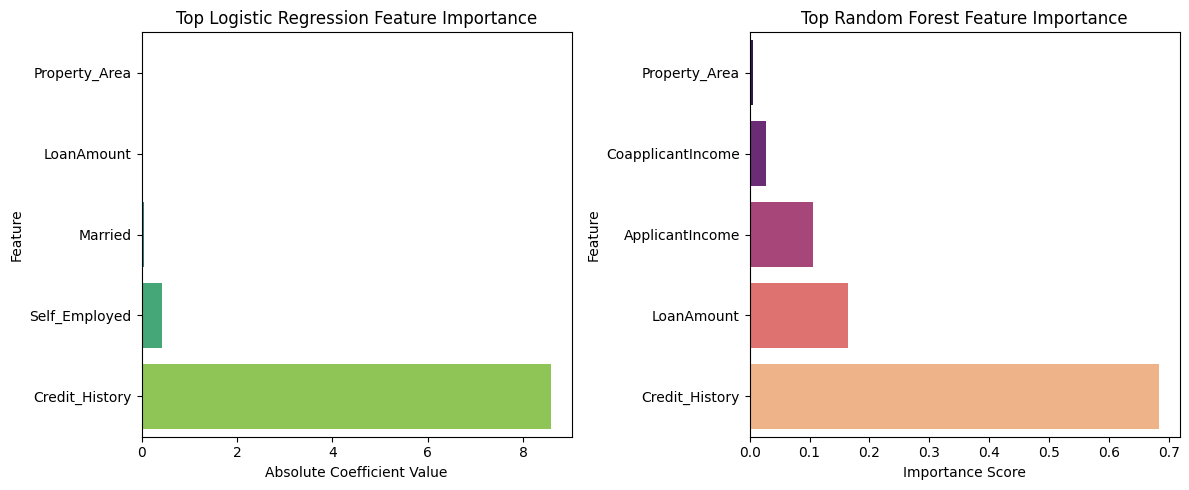

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming coef_df and feat_imp DataFrames from previous code

# Select top 5 for visualization (can adjust number)
top_n = 5

# Logistic Regression top features
top_coef = coef_df.head(top_n).sort_values(by='Abs_Coefficient', ascending=True)

# Random Forest top features
top_rf = feat_imp.head(top_n).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(12,5))

# Logistic Regression Coefficients plot
plt.subplot(1,2,1)
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_coef, palette='viridis')
plt.title('Top Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')

# Random Forest Feature Importance plot
plt.subplot(1,2,2)
sns.barplot(x='Importance', y='Feature', data=top_rf, palette='magma')
plt.title('Top Random Forest Feature Importance')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()
